# Modelagem e simualção Projeto 3

Para a realização do projeto 3, escolhemos modelar um sistema mecanico, no qual simulará uma pessoa pulando de bungee jump

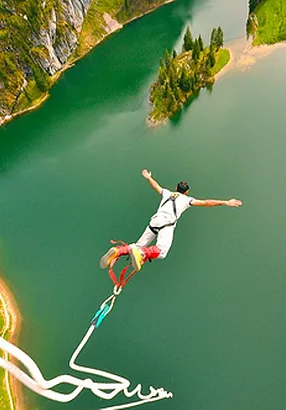

<hr>

<h2>Perguntas a serem respondidas</h2>

<ul>
    <li>Como seria o mesmo salto em diferentes gravidades</li>
    <li>Como seria o mesmo salto com diferentes massas </li>
<ul>

<hr>

<h2>Equações</h2>

<img src='imgs/formula.png'>


<hr>

<h2>Glossário</h2>

In [227]:
M= 75 #massa (kg)
G= 9.8 #gravidade (m/s²)
c= 1  #coeficiente de arrasto (admencional)
A= 0.9 #área de contato da pessoa com o ar (m²)
K= 10 #constante elástica (N/m) 
C= 10  #constante de amortecimento (N*s/m) 
L0 = 50 #comprimento natural do elástico (m)

<hr>

<h2>Código</h2>

<h4>Bibliotecas</h4>

In [228]:
from math import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np


In [229]:
def Modelo(X,T):
    y = X[0]
    vy = X[1]
    
    P = M*G 
    D = (c * A* vy*abs(vy))/2
    if y >= L0: #Elástico tensionado
        Fel = K * (y - L0)
        Fam = C * vy
    else: #Elástico não tensionado
        Fel = 0
        Fam = 0
    
    dydt = vy
    dvydt = (P - D - Fel - Fam) / M
    
    return [dydt, dvydt]

In [230]:
y0 = 0
vy0 = 0
x_0 = [y0,vy0] #Condições iniciais

tempo = np.arange(0,2*60,0.1)

solucao = odeint(Modelo,x_0,tempo)
y = solucao[:,0]
vy = solucao[:,1]

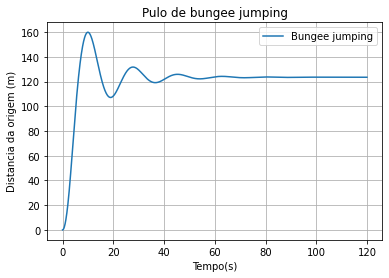

In [231]:
plt.plot(tempo, y, label = 'Bungee jumping')
plt.xlabel('Tempo(s)')
plt.ylabel('Distancia da origem (m)')
plt.title('Pulo de bungee jumping')
plt.legend()
plt.grid()
plt.show()

altura máxima atingida caindo horizontalmente: 159.91m
altura máxima atingida caindo de cabeça: 184.28m


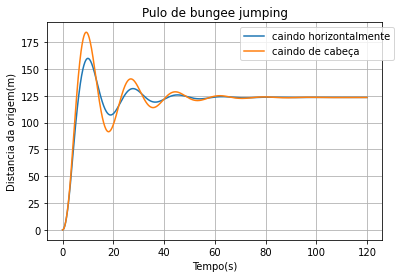

In [232]:
#Diferentes gravidades
Ax = [0.9, 0.2]
cx = [1, 0.7]  
modo = ['horizontalmente', 'de cabeça']
legendas = []

#Calcula a distância atingida em função do tempo variando a forma de se cair (as constantes envolvidas no arrasto)
for i in range(0,2):
    A = Ax[i]
    c = cx[i]
    solucao = odeint(Modelo,x_0,tempo)
    y = solucao[:,0]
    vy = solucao[:,1]
    plt.plot(tempo, y)
    print('altura máxima atingida caindo ' + modo[i]+': {:.2f}m'.format(max(y)))
    legendas.append('caindo '+ modo[i])
    
    
plt.xlabel('Tempo(s)')
plt.ylabel('Distancia da origem(m)')
plt.title('Pulo de bungee jumping')
plt.legend(legendas, bbox_to_anchor = (1.05, 1))
plt.grid()
plt.show()

altura máxima atingida por uma pessoa de 45kg: 132.04m
altura máxima atingida por uma pessoa de 50kg: 140.79m
altura máxima atingida por uma pessoa de 55kg: 149.53m
altura máxima atingida por uma pessoa de 60kg: 158.26m
altura máxima atingida por uma pessoa de 65kg: 166.98m
altura máxima atingida por uma pessoa de 70kg: 175.69m
altura máxima atingida por uma pessoa de 75kg: 184.39m
altura máxima atingida por uma pessoa de 80kg: 193.10m
altura máxima atingida por uma pessoa de 85kg: 201.80m
altura máxima atingida por uma pessoa de 90kg: 210.51m
altura máxima atingida por uma pessoa de 95kg: 219.22m
altura máxima atingida por uma pessoa de 100kg: 227.92m


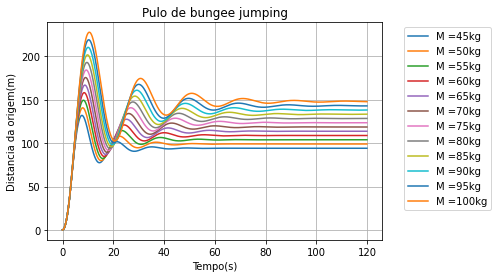

In [233]:
m = np.arange(45, 101, 5)
G = 9.81
legendas = []
altura_max = []

#Calcula a distância atingida em função do tempo variando a massa da pessoa
for M in m:
    solucao = odeint(Modelo,x_0,tempo)
    y = solucao[:,0]
    vy = solucao[:,1]
    plt.plot(tempo, y)
    altura_max.append(max(y))
    print('altura máxima atingida por uma pessoa de ' + str(M) + 'kg: {:.2f}m'.format(max(y)))
    legendas.append('M ='+ str(M)+ 'kg')
    
plt.xlabel('Tempo(s)')
plt.ylabel('Distancia da origem(m)')
plt.title('Pulo de bungee jumping')
plt.legend(legendas, bbox_to_anchor = (1.05, 1))
plt.grid()
plt.show()

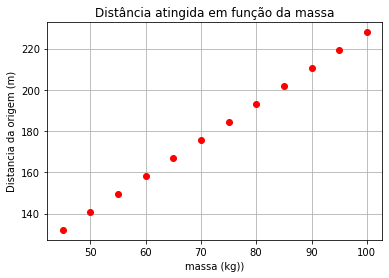

In [234]:
plt.plot(m, altura_max, 'ro')
plt.xlabel('massa (kg))')
plt.ylabel('Distancia da origem (m)')
plt.title('Distância atingida em função da massa')
plt.grid()
plt.show()